#Credit Card default prediction-ML Project
##IIT palakkad MTech(Data Science)
**Team Members:**
1. Abhishek S Mayya(142302014)
2. Shreyansh Acharya(142302013)
3. Saikat samui(142302015)



##Project Description
This project focuses on predicting instances of customers defaulting on their credit card payments.With a risk management perspective in mind, accurately predicting whether a customer is likely to default on their bills in future terms holds significant importance.

We will assess and identify customers who are likely to default on their credit card payments. Subsequently, we will categorize customers into two groups: those who are likely to default and those who are not.

In [329]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [330]:
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

###About the data

In [331]:
import pandas as pd
import numpy as np
data=pd.read_excel('/content/drive/MyDrive/credit_card.xls')

We have the credit card dataset from Taiwan : https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients
####Description of the dependent and independent features



* ***ID***: ID of the client
* ***LIMIT_BAL***:Amount of credit given in NT dollars


* ***SEX***:
1. For male :1
2. For female :2


* ***EDUCATION***:
1. For graduate school :1
2. For university :2
3. For high school :3
4. Others :4

* ***MARRIAGE***: Marital status
1. For married :1
2. For single :2
3. For others :3

* ***AGE***: Age in years
* Pay_0: Payment status in september,2005
* PAY_2: Repayment status in August, 2005
* PAY_3: Repayment status in July, 2005
* PAY_4: Repayment status in June, 2005
* PAY_5: Repayment status in May, 2005
* PAY_6: Repayment status in April, 2005

The measurement scale for the repayment status is as follows,
1. Pay duly :-1 or 0
2. Payment delay for one month :1  
3. Payment delay for two months :2

similarly
4. Payment delay for eight months :8
5. Payment delay for nine months and above :9

* BILL_AMT1: Amount of bill statement in September, 2005
* BILL_AMT2: Amount of bill statement in August, 2005
* BILL_AMT3: Amount of bill statement in July, 2005
* BILL_AMT4: Amount of bill statement in June, 2005
* BILL_AMT5: Amount of bill statement in May, 2005
* BILL_AMT6: Amount of bill statement in April, 2005
* PAY_AMT1: Amount of previous payment in September, 2005
* PAY_AMT2: Amount of previous payment in August, 2005
* PAY_AMT3: Amount of previous payment in July, 2005
* PAY_AMT4: Amount of previous payment in June, 2005
* PAY_AMT5: Amount of previous payment in May, 2005
* PAY_AMT6: Amount of previous payment in April, 2005

(All the amounts in NT dollar)
* Default payment next month:
1. If Default payment is yes :1
2. If Default payment is No :0





In [332]:
data

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


##Preprocessing

####Setting the column names properly

By looking at the data we can see that the column name for each features is shown as a seperate data point,in the 0 row index.

In [333]:
column_names=data.iloc[0]#First row of the data frame is column names.
data = data[1:]  # Remove the first row from the DataFrame and updating the data frame
data.columns = column_names  # Set the column names

In [334]:
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


###Checking for Null values

In [335]:
data.isnull().sum()

0
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

There are no Null values in the given data set.

###Value counts in each features

In [336]:
column_names=data.columns
column_names

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name=0)

In [337]:
for names in column_names:
  print(f"For {names} the value counts are \n",data[names].value_counts())

For ID the value counts are 
 1        1
19997    1
20009    1
20008    1
20007    1
        ..
9996     1
9995     1
9994     1
9993     1
30000    1
Name: ID, Length: 30000, dtype: int64
For LIMIT_BAL the value counts are 
 50000      3365
20000      1976
30000      1610
80000      1567
200000     1528
           ... 
730000        2
1000000       1
327680        1
760000        1
690000        1
Name: LIMIT_BAL, Length: 81, dtype: int64
For SEX the value counts are 
 2    18112
1    11888
Name: SEX, dtype: int64
For EDUCATION the value counts are 
 2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64
For MARRIAGE the value counts are 
 2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64
For AGE the value counts are 
 29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     8



*   Education has 345 undefined values 0,5 and 6,which is very less compared total number of data 30000

*   Marriage has 54 undefined value of 0, which is very less compared total number of data 30000

We will apply one hot encoding for these two columns

* Repayment status has undefined values -2

There is no explanation for this values -2,hence we cannot assume anything,and just have to remove the rows that contain these values.

We will replace -1 with 0 as both the values have the same meaning according to the repayment status scores in Taiwan.


####Repayment status
Removing all the rows having -2 for columns between PAY_0(index:6) to PAY_6(index:13)

In [338]:
condition=(data.loc[:,'PAY_0':'PAY_6'] == -2).any(axis=1)
data = data[~condition]

Replacing 0's with -1

In [339]:
data.loc[:, 'PAY_0':'PAY_6'] = data.loc[:, 'PAY_0':'PAY_6'].replace(0,-1)

In [340]:
for column in data.loc[:, 'PAY_0':'PAY_6'].columns:
    value_counts = data[column].value_counts()
    print(f"\nValue counts for {column}:\n{value_counts}")


Value counts for PAY_0:
-1    18299
 2     2518
 1     2181
 3      305
 4       74
 5       23
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

Value counts for PAY_2:
-1    19291
 2     3662
 3      317
 4       95
 5       25
 7       20
 1       16
 6       12
 8        1
Name: PAY_2, dtype: int64

Value counts for PAY_3:
-1    19482
 2     3570
 3      233
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64

Value counts for PAY_4:
-1    20080
 2     3009
 3      179
 4       69
 7       58
 5       35
 6        5
 1        2
 8        2
Name: PAY_4, dtype: int64

Value counts for PAY_5:
-1    20573
 2     2527
 3      176
 4       83
 7       58
 5       17
 6        4
 8        1
Name: PAY_5, dtype: int64

Value counts for PAY_6:
-1    20438
 2     2695
 3      177
 4       49
 7       46
 6       19
 5       13
 8        2
Name: PAY_6, dtype: int64


####ID
ID is not usefull when we fit the model,as it does not effect the output in anyway.Hence we need to remove the ID column.

In [341]:
data=data.drop(columns=['ID'])

####Checking the value counts of output class

Text(0.5, 1.0, 'Proportion of Default Payment is YES or NO')

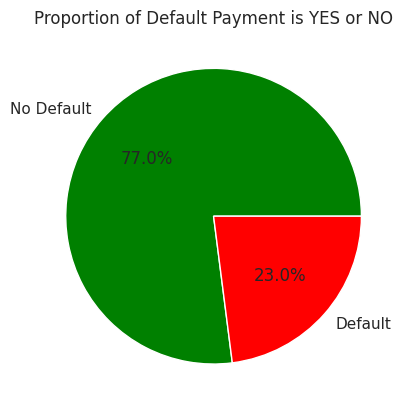

In [342]:
import matplotlib.pyplot as plt
plt.pie(data['default payment next month'].value_counts(),autopct='%1.1f%%',colors=['green','red'],labels=['No Default', 'Default'])
plt.title('Proportion of Default Payment is YES or NO')

Its clearly an imbalanced data set,hence we may have to balance the data set using techniques like SMOTE

##EDA

### Payment Status (PAY_X)

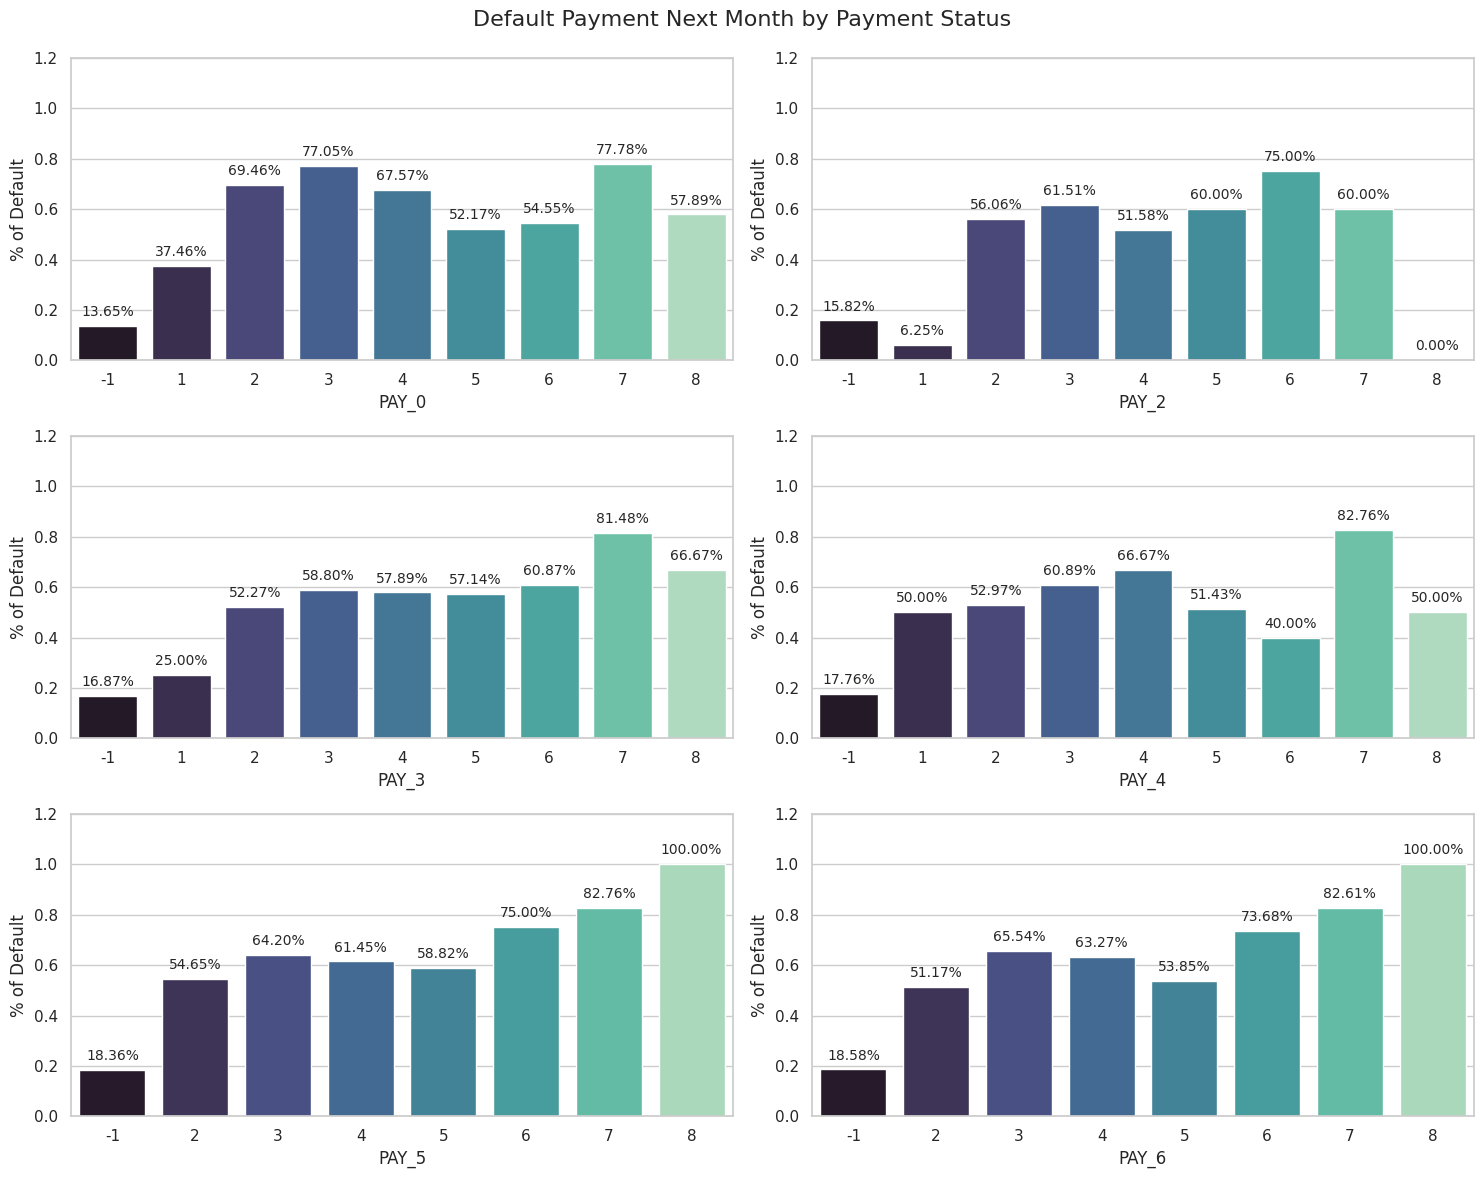

In [343]:
import matplotlib.pyplot as plt
import seaborn as sns

pay_x_pts = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

plt.figure(figsize=(15, 12))
sns.set(style="whitegrid")

for i, col in enumerate(pay_x_pts):
    plt.subplot(3, 2, i + 1)
    ax = sns.barplot(x=col, y="default payment next month", data=data, palette='mako', errwidth=0)

    plt.ylabel("% of Default", fontsize=12)
    plt.ylim(0, 1.2)
    plt.xlabel(f'{col}', fontsize=12)

    #Annotate the bars with percentages
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.2%}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

#Adjust layout and showing the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.suptitle('Default Payment Next Month by Payment Status', fontsize=16)
plt.show()



*  Credit card holders who consistently defer their payments for over three months demonstrate a markedly elevated likelihood of encountering defaults.

###Amount of Bill Statement (BILL_AMT)

In [344]:
def draw_histograms(df, variables, n_rows, n_cols, n_bins):
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 10))
    for i, var_name in enumerate(variables):
        row = i // n_cols
        col = i % n_cols
        sns.histplot(data=df, x=var_name, bins=n_bins, ax=axes[row, col])
        axes[row, col].set_title(var_name)
    fig.tight_layout()
    plt.show()

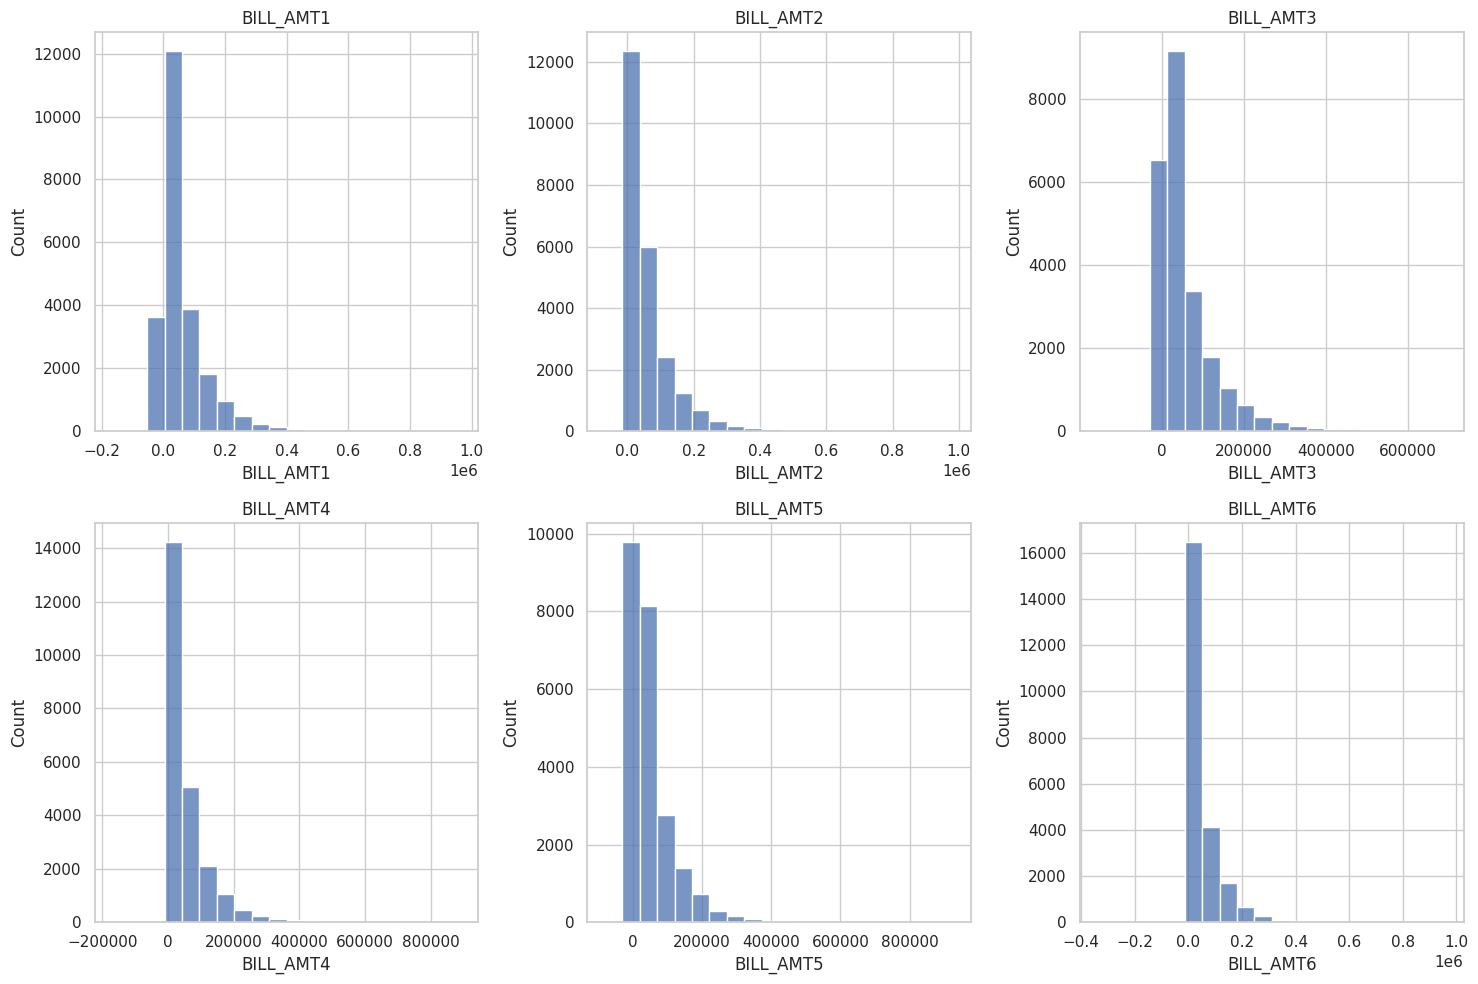

In [345]:
bill_amt_fts = ['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
bills = data[bill_amt_fts]
draw_histograms(bills, bills.columns, 2, 3, 20)

###PAY_AMT

In [346]:
data['PAY_AMT1_bin'] = data['PAY_AMT1'].copy()
data['PAY_AMT2_bin'] = data['PAY_AMT2'].copy()
data['PAY_AMT3_bin'] = data['PAY_AMT3'].copy()
data['PAY_AMT4_bin'] = data['PAY_AMT4'].copy()
data['PAY_AMT5_bin'] = data['PAY_AMT5'].copy()
data['PAY_AMT6_bin'] = data['PAY_AMT6'].copy()

In [347]:
pay_amt_bins = ['PAY_AMT1_bin', 'PAY_AMT2_bin', 'PAY_AMT3_bin', 'PAY_AMT4_bin', 'PAY_AMT5_bin', 'PAY_AMT6_bin']

for i, col in enumerate (pay_amt_bins):
    data[col] = pd.cut(data[pay_amt_bins[i]],[-1, 0, 25000, 50000, 100000, 2000000])

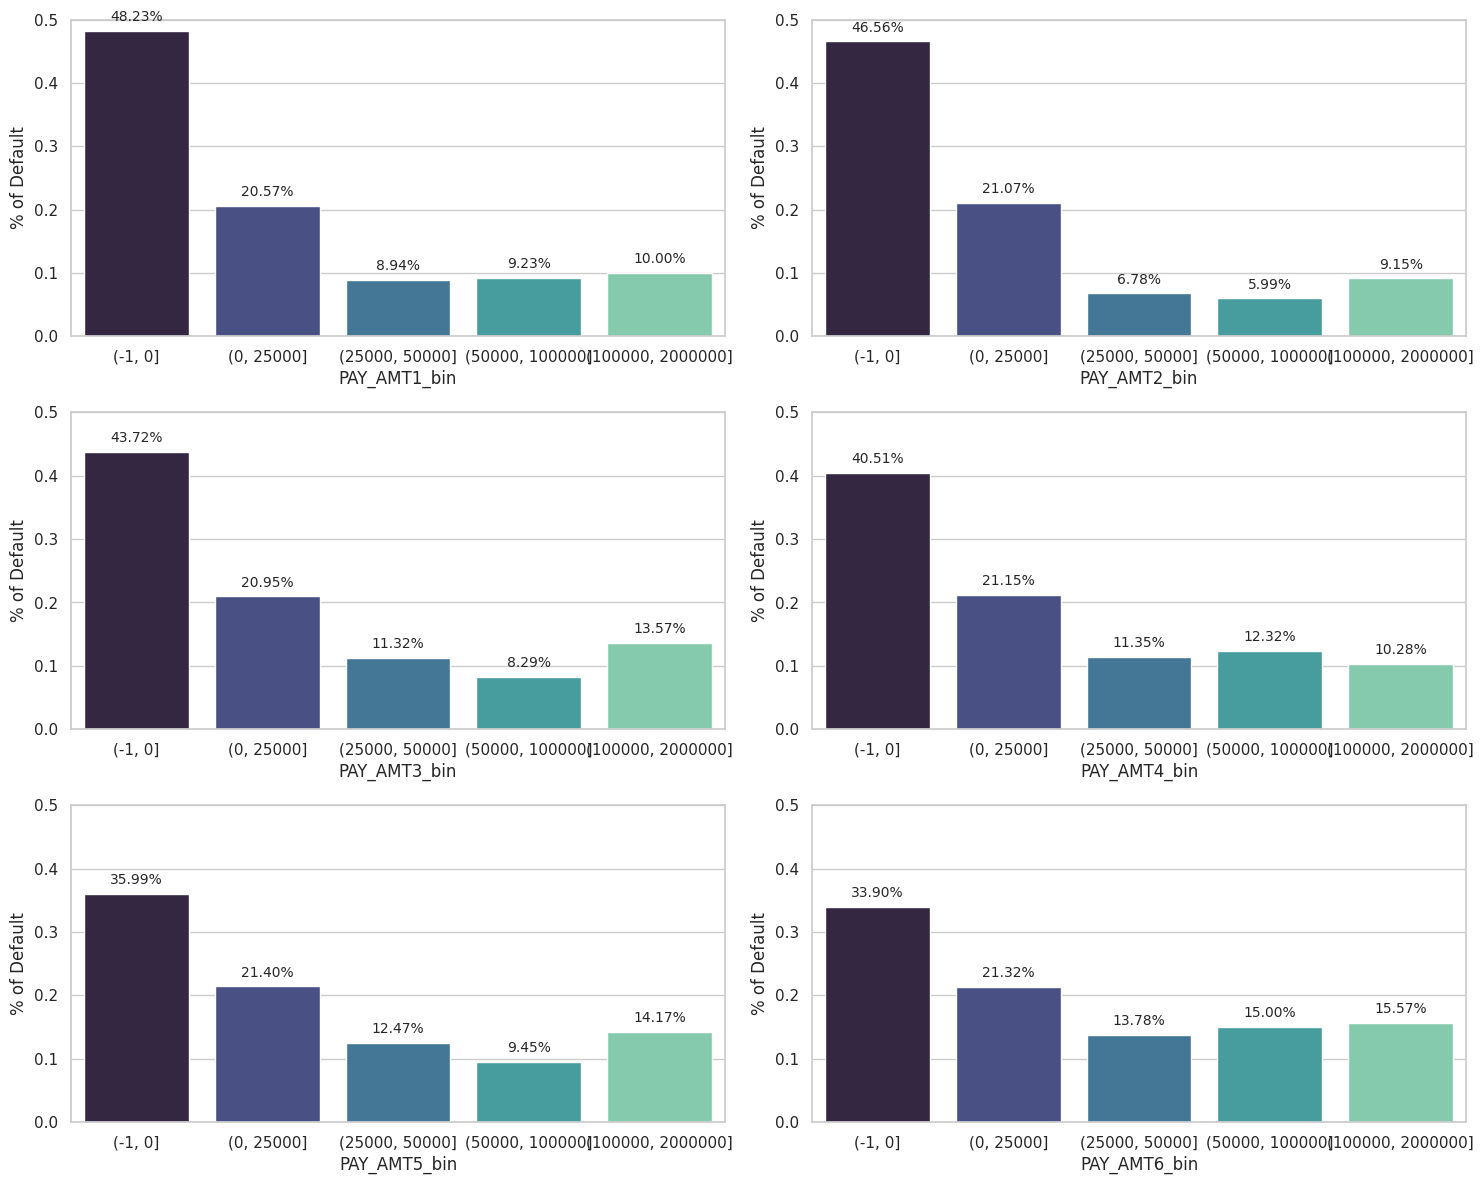

In [348]:
plt.figure(figsize=(15, 12))

for i, col in enumerate(pay_amt_bins):
    plt.subplot(3, 2, i + 1)
    ax = sns.barplot(x=col, y="default payment next month", data=data, palette='mako', errwidth=0)

    plt.ylabel("% of Default", fontsize=12)
    plt.ylim(0, 0.5)
    plt.tight_layout()

    for p in ax.patches:
        ax.annotate(f"{p.get_height():.2%}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.show()


-> Individuals who made no payments in the previous months exhibit a higher default rate, whereas those who paid over 25k NT dollars have lower default rates.

###Categorical Columns (SEX, EDUCATION, MARRIAGE)

### Column EDUCATION

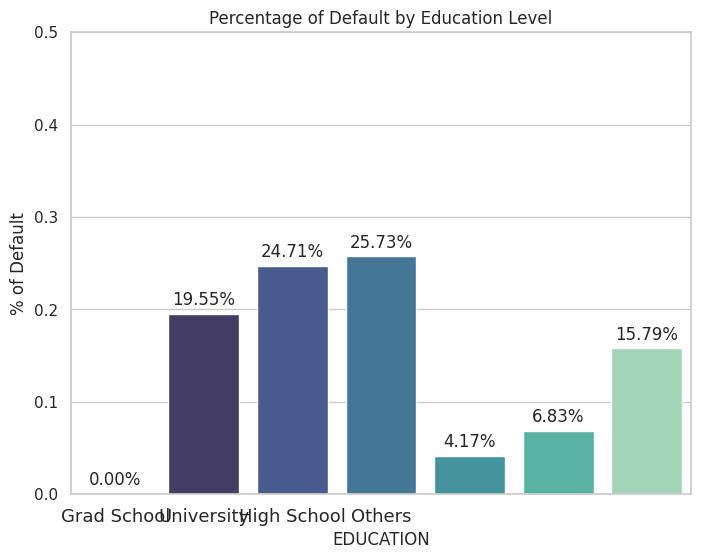

In [349]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for EDUCATION
plt.figure(figsize=(8, 6))
ax = sns.barplot(x="EDUCATION", y="default payment next month", data=data, palette='mako', errwidth=0)
ax.set_ylabel("% of Default", fontsize=12)
ax.set_ylim(0, 0.5)
ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(['Grad School', 'University', 'High School', 'Others'], fontsize=13)

for p in ax.patches:
    ax.annotate(f"{p.get_height():.2%}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

plt.title('Percentage of Default by Education Level')
plt.show()


-> The probability of default decreases with higher levels of education.

### COLUMN MARRIAGE

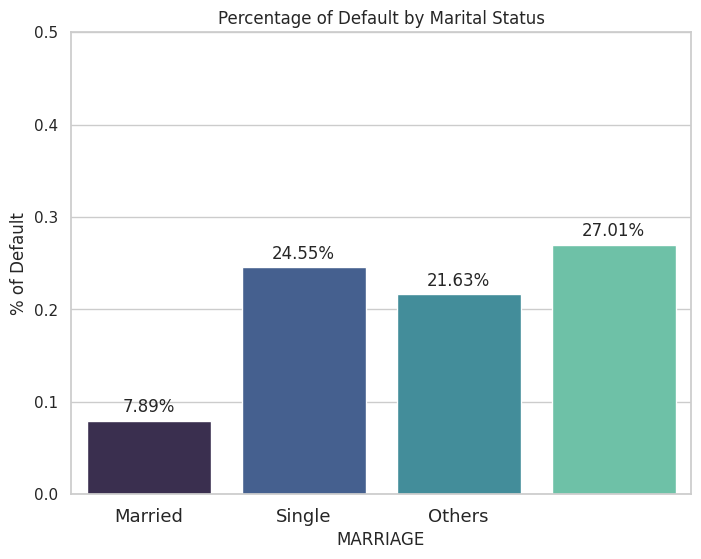

In [350]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for MARRIAGE
plt.figure(figsize=(8, 6))
ax = sns.barplot(x="MARRIAGE", y="default payment next month", data=data, palette='mako', errwidth=0)
ax.set_ylabel("% of Default", fontsize=12)
ax.set_ylim(0, 0.5)
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['Married', 'Single', 'Others'], fontsize=13)

for p in ax.patches:
    ax.annotate(f"{p.get_height():.2%}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

plt.title('Percentage of Default by Marital Status')
plt.show()


###COLUMN SEX

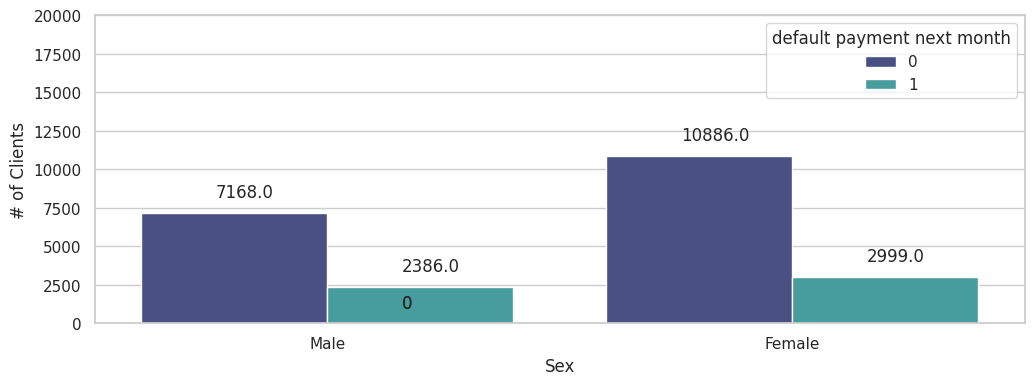

In [351]:
plt.figure(figsize=(12,4))
ax = sns.countplot(data = data, x = 'SEX', hue="default payment next month", palette = 'mako')

plt.xlabel("Sex", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,20000)
plt.xticks([0,1],['Male', 'Female'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.16, p.get_height()+1000))

plt.show()

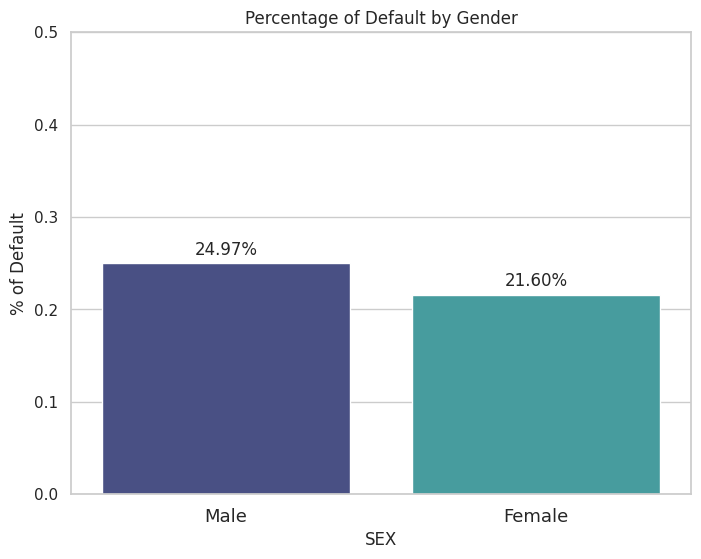

In [352]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for SEX
plt.figure(figsize=(8, 6))
ax = sns.barplot(x="SEX", y="default payment next month", data=data, palette='mako', errwidth=0)
ax.set_ylabel("% of Default", fontsize=12)
ax.set_ylim(0, 0.5)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Male', 'Female'], fontsize=13)

for p in ax.patches:
    ax.annotate(f"{p.get_height():.2%}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

plt.title('Percentage of Default by Gender')
plt.show()




-> Individuals with marital statuses categorized as married or other have an approximate default probability of 24.76%, whereas single individuals have a lower likelihood at 21.75%.

-> Despite a smaller representation of males in the dataset compared to females, males demonstrate a higher probability of being defaulters.

### AGE COLUMN

<Axes: xlabel='AGE', ylabel='Count'>

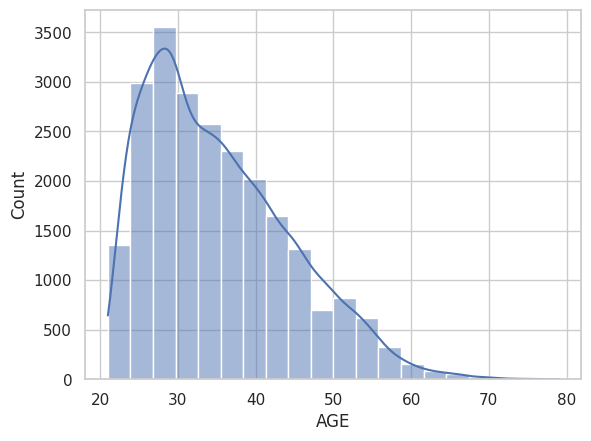

In [353]:
sns.histplot(data['AGE'],bins=20,kde=True)

The majority of individuals in the dataset fall within the age range of 25 to 35

In [354]:
data['AgeBin'] = pd.cut(data['AGE'],[20, 25, 30, 35, 40, 50, 60, 80])
print(data['AgeBin'].value_counts())

(25, 30]    5694
(40, 50]    4613
(30, 35]    4367
(35, 40]    3690
(20, 25]    3301
(50, 60]    1563
(60, 80]     211
Name: AgeBin, dtype: int64


In [355]:
data['AgeBin'] = data['AgeBin'].astype('str')
AgeBin_order = ['(20, 25]', '(25, 30]', '(30, 35]', '(35, 40]', '(40, 50]', '(50, 60]', '(60, 80]']

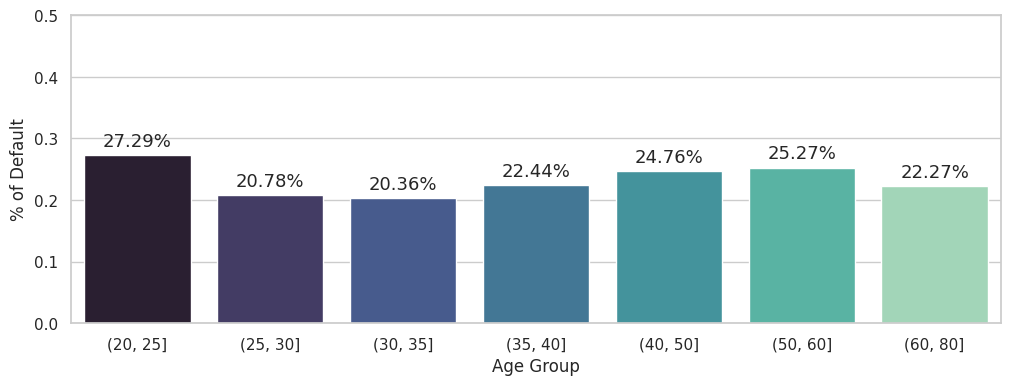

In [356]:
plt.figure(figsize=(12, 4))

ax = sns.barplot(x="AgeBin", y="default payment next month", data=data, palette='mako', errwidth=0, order=AgeBin_order)

plt.xlabel("Age Group", fontsize=12)
plt.ylabel("% of Default", fontsize=12)
plt.ylim(0, 0.5)

for p in ax.patches:
    ax.annotate(f"{p.get_height():.2%}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=13)

plt.show()


-> Individuals in the age range of 20 to 25, as well as those aged between 50 and 60, demonstrate a higher susceptibility to default on their credit card payments.

### LIMIT BALANCE COLUMN (LIMIT_BAL)

<Axes: xlabel='LIMIT_BAL', ylabel='Count'>

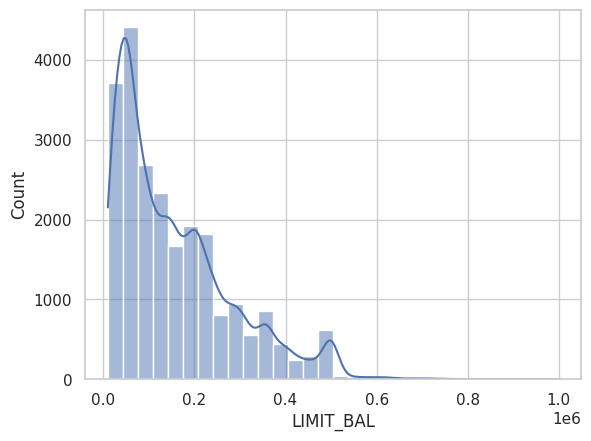

In [357]:
sns.histplot(data['LIMIT_BAL'],bins=30,kde=True)

In [358]:
data['LimitBin'] = pd.cut(data['LIMIT_BAL'],[5000, 50000, 100000, 150000, 200000, 300000, 400000, 500000, 1100000])
print(data['LimitBin'].value_counts())

(5000, 50000]        6663
(50000, 100000]      4142
(200000, 300000]     3571
(100000, 150000]     3114
(150000, 200000]     2808
(300000, 400000]     1838
(400000, 500000]     1146
(500000, 1100000]     157
Name: LimitBin, dtype: int64


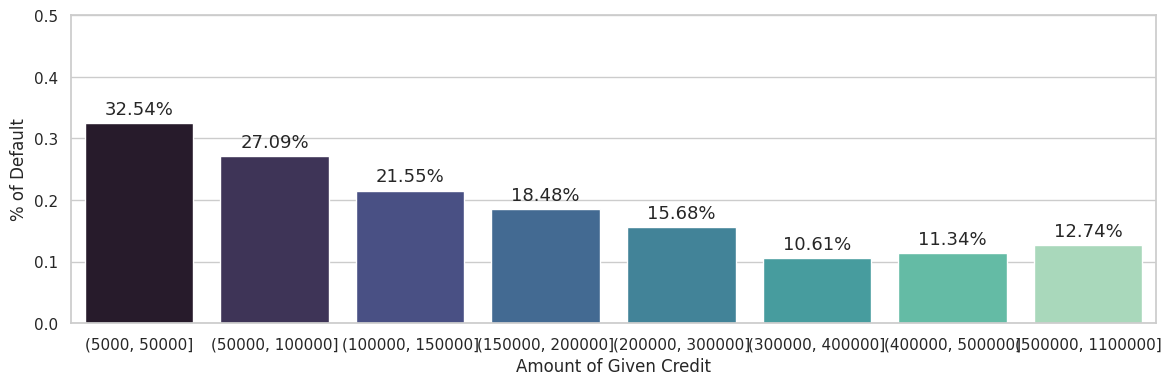

In [359]:
plt.figure(figsize=(14,4))
data['LimitBin'] = data['LimitBin'].astype('str')
LimitBin_order = ['(5000, 50000]', '(50000, 100000]', '(100000, 150000]', '(150000, 200000]',
                '(200000, 300000]', '(300000, 400000]', '(400000, 500000]', '(500000, 1100000]']

ax = sns.barplot(x="LimitBin", y="default payment next month", data=data, palette='mako', errwidth=0, order=LimitBin_order)

plt.xlabel("Amount of Given Credit", fontsize=12)
plt.ylabel("% of Default", fontsize=12)
plt.ylim(0, 0.5)

for p in ax.patches:
    ax.annotate(f"{p.get_height():.2%}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=13)

plt.show()



-> A majority, nearly 60%, of defaulting customers possess credit limits below 100k NT dollars.


In [360]:
data.isnull().sum()

0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
PAY_AMT1_bin                  0
PAY_AMT2_bin                  0
PAY_AMT3_bin                  0
PAY_AMT4_bin                  0
PAY_AMT5_bin                  0
PAY_AMT6_bin                  0
AgeBin                        0
LimitB

##Label Encoding

In [361]:
data['default payment next month'].dtype

dtype('O')



* Data type is dtype('O') for the target: This will have various types like integer,strings.
* To perform smote we need the dtype('int64') ,without loosing the actual value of the data.Hence need to use Label Encoding.



In [362]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['default payment next month'] = label_encoder.fit_transform(data['default payment next month'])

In [363]:
data['default payment next month'].dtype

dtype('int64')

In [364]:
data['default payment next month'].value_counts()

0    18054
1     5385
Name: default payment next month, dtype: int64

In [365]:
print(data.dtypes)

0
LIMIT_BAL                       object
SEX                             object
EDUCATION                       object
MARRIAGE                        object
AGE                             object
PAY_0                           object
PAY_2                           object
PAY_3                           object
PAY_4                           object
PAY_5                           object
PAY_6                           object
BILL_AMT1                       object
BILL_AMT2                       object
BILL_AMT3                       object
BILL_AMT4                       object
BILL_AMT5                       object
BILL_AMT6                       object
PAY_AMT1                        object
PAY_AMT2                        object
PAY_AMT3                        object
PAY_AMT4                        object
PAY_AMT5                        object
PAY_AMT6                        object
default payment next month       int64
PAY_AMT1_bin                  category
PAY_AMT2_bin           

##One hot encoding

In [366]:
from sklearn.preprocessing import OneHotEncoder

# Convert undefined values in 'EDUCATION' column to strings
data['EDUCATION'] = data['EDUCATION'].replace({0: 5, 5: 5, 6: 5})

# Convert undefined values in 'MARRIAGE' column to strings
data['MARRIAGE'] = data['MARRIAGE'].replace({0: 4})

# Define columns to one-hot encode
columns_to_encode_education = ['EDUCATION']
columns_to_encode_marriage = ['MARRIAGE']

# Create a OneHotEncoder object
one_hot_encoder_education = OneHotEncoder(sparse=False)
one_hot_encoder_marriage = OneHotEncoder(sparse=False)

# Fit the encoder on the specified columns
one_hot_encoder_education.fit(data[columns_to_encode_education])
one_hot_encoder_marriage.fit(data[columns_to_encode_marriage])

# Transform the specified columns and append them to the DataFrame
encoded_columns_education = pd.DataFrame(one_hot_encoder_education.transform(data[columns_to_encode_education]))
encoded_columns_marriage = pd.DataFrame(one_hot_encoder_marriage.transform(data[columns_to_encode_marriage]))

# Get category names from OneHotEncoder
education_categories = ['graduate school', 'university', 'high school', 'Others', 'undefined_education']
marriage_categories = ['married', 'single', 'Others_Marriage', 'undefined_marriage']

# Rename the one-hot encoded columns
encoded_columns_education.columns = education_categories
encoded_columns_marriage.columns = marriage_categories

# Check if indexes align before concatenation
print("Indexes of data:")
print(data.index)
print("Indexes of encoded columns:")
print(encoded_columns_education.index)
print(encoded_columns_marriage.index)



Indexes of data:
Int64Index([    2,     3,     4,     5,     6,     7,     8,     9,    11,
               12,
            ...
            29989, 29991, 29992, 29994, 29995, 29996, 29997, 29998, 29999,
            30000],
           dtype='int64', length=23439)
Indexes of encoded columns:
RangeIndex(start=0, stop=23439, step=1)
RangeIndex(start=0, stop=23439, step=1)


In [367]:
# Concatenate the original DataFrame with the one-hot encoded columns
data_encoded = pd.concat([data.reset_index(drop=True), encoded_columns_education.reset_index(drop=True), encoded_columns_marriage.reset_index(drop=True)], axis=1)

# Drop the original columns as they are no longer needed
data_encoded.drop(columns=columns_to_encode_education + columns_to_encode_marriage, inplace=True)

In [368]:
data_encoded

,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,LimitBin,graduate school,university,high school,Others,undefined_education,married,single,Others_Marriage,undefined_marriage
0,120000,2,26,-1,2,-1,-1,-1,2,2682,...,"(100000, 150000]",0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,90000,2,34,-1,-1,-1,-1,-1,-1,29239,...,"(50000, 100000]",0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,50000,2,37,-1,-1,-1,-1,-1,-1,46990,...,"(5000, 50000]",0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,50000,1,57,-1,-1,-1,-1,-1,-1,8617,...,"(5000, 50000]",0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,50000,1,37,-1,-1,-1,-1,-1,-1,64400,...,"(5000, 50000]",1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23434,220000,1,39,-1,-1,-1,-1,-1,-1,188948,...,"(200000, 300000]",0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
23435,150000,1,43,-1,-1,-1,-1,-1,-1,1683,...,"(100000, 150000]",0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
23436,30000,1,37,4,3,2,-1,-1,-1,3565,...,"(5000, 50000]",0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
23437,80000,1,41,1,-1,-1,-1,-1,-1,-1645,...,"(50000, 100000]",0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [369]:
data_encoded.isnull().sum()

LIMIT_BAL                     0
SEX                           0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
PAY_AMT1_bin                  0
PAY_AMT2_bin                  0
PAY_AMT3_bin                  0
PAY_AMT4_bin                  0
PAY_AMT5_bin                  0
PAY_AMT6_bin                  0
AgeBin                        0
LimitBin                      0
graduate school               0
universi

##Train test split

In [370]:
data_encoded.columns

Index(['LIMIT_BAL', 'SEX', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month',
       'PAY_AMT1_bin', 'PAY_AMT2_bin', 'PAY_AMT3_bin', 'PAY_AMT4_bin',
       'PAY_AMT5_bin', 'PAY_AMT6_bin', 'AgeBin', 'LimitBin', 'graduate school',
       'university', 'high school', 'Others', 'undefined_education', 'married',
       'single', 'Others_Marriage', 'undefined_marriage'],
      dtype='object')

In [371]:
X=data_encoded.drop(columns=['default payment next month','PAY_AMT1_bin', 'PAY_AMT2_bin', 'PAY_AMT3_bin', 'PAY_AMT4_bin',
                             'PAY_AMT5_bin', 'PAY_AMT6_bin', 'AgeBin', 'LimitBin'])
y=data_encoded['default payment next month']

In [372]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

##Feature scaling

In [373]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

##Balancing of the data using (Synthetic Minority Over-sampling Technique)


In [374]:
from imblearn.over_sampling import SMOTE
sm= SMOTE(random_state=42)
x_smote,y_smote =sm.fit_resample(X_train,y_train)
print('Original dataset shape', len(y_train))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 16407
Resampled dataset shape 25400


Text(0.5, 1.0, 'Proportion of Default Payment is YES or NO')

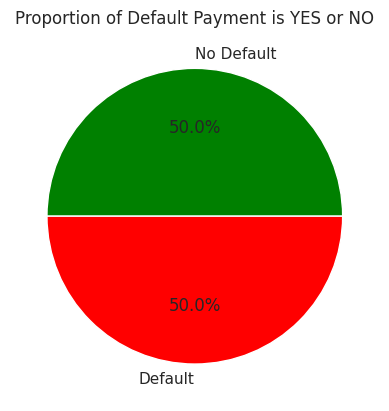

In [375]:
import matplotlib.pyplot as plt
plt.pie(y_smote.value_counts(),autopct='%1.1f%%',colors=['green','red'],labels=['No Default', 'Default'])
plt.title('Proportion of Default Payment is YES or NO')

##Logistic Regression

In [376]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score,roc_curve,auc
lor=LogisticRegression()
lor.fit(x_smote,y_smote)

LogisticRegression()

In [377]:
y_pred_lor_train=lor.predict(X_train)
y_pred_lor_test=lor.predict(X_test)

In [378]:
#Roc-AUC score for test data
roc_lor=roc_auc_score(y_test,y_pred_lor_test)

In [379]:
roc_lor

0.7148796105793269

##RandomForest

#### RandomSearchCV

In [380]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
#Number of trees in random forest
n_estimators = [10,20,30,40]

#Number of features to consider at every split
max_features = [0.2,0.6,1.0]

#Maximum number of levels in tree
max_depth = [5,10,15,20,None]

#Number of samples
max_samples = [0.5,0.75,1.0]

#Bootstrap samples
bootstrap = [True,False]

#Minimum number of samples required to split a node
min_samples_split = [2, 5]

#Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

In [381]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples,
              'bootstrap':bootstrap,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf
             }
print(param_grid)

{'n_estimators': [10, 20, 30, 40], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [5, 10, 15, 20, None], 'max_samples': [0.5, 0.75, 1.0], 'bootstrap': [True, False], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}


In [382]:

rf_grid = RandomizedSearchCV(estimator = rf,
                       param_distributions = param_grid,
                       cv = 5,
                       verbose=2,
                       n_jobs = -1,refit=True)

In [383]:
rf_grid.fit(x_smote,y_smote)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 15, 20, None],
                                        'max_features': [0.2, 0.6, 1.0],
                                        'max_samples': [0.5, 0.75, 1.0],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [10, 20, 30, 40]},
                   verbose=2)

In [384]:
rf_grid.best_params_

{'n_estimators': 40,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_samples': 1.0,
 'max_features': 0.6,
 'max_depth': 15,
 'bootstrap': True}

In [385]:
rf_grid.best_score_

0.8245275590551181

In [386]:
rf_grid.best_estimator_

RandomForestClassifier(max_depth=15, max_features=0.6, max_samples=1.0,
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=40)

In [387]:
y_pred_rf_test=rf_grid.predict(X_test)
y_pred_rf_train=rf_grid.predict(X_train)

In [388]:
roc_rf=roc_auc_score(y_test, y_pred_rf_test)
roc_rf

0.6928777477144954

##Adaboosting

In [389]:
from sklearn.utils import class_weight
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import accuracy_score

adaboost_classifier = AdaBoostClassifier()

#Paramgrid
param_dist = {
    'n_estimators': [25,50,100,200],
    'learning_rate': [0.1,0.5,1,2]
    # add other hyperparameters as needed
}

#Create a RandomizedSearchCV object
adaboost_grid = RandomizedSearchCV(
    estimator=adaboost_classifier,
    param_distributions=param_dist,
    cv=5,
    scoring='accuracy',
    n_iter=10,  #Number of iterations as needed
    random_state=42,
    refit=True
)

# Fit the RandomizedSearchCV object to the data
adaboost_grid.fit(x_smote, y_smote)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(),
                   param_distributions={'learning_rate': [0.1, 0.5, 1, 2],
                                        'n_estimators': [25, 50, 100, 200]},
                   random_state=42, scoring='accuracy')

In [390]:
adaboost_grid.best_params_

{'n_estimators': 200, 'learning_rate': 1}

In [391]:

#Access the best estimator (model) directly
best_adaboost_model = adaboost_grid.best_estimator_
# Make predictions on the train and test set
y_pred_ad_test=adaboost_grid.predict(X_test)
y_pred_ad_train=adaboost_grid.predict(X_train)

In [392]:
roc_ad=roc_auc_score(y_test, y_pred_ad_test)
roc_ad

0.7027113276340237

###Using Logistic regression in Adaboosting

In [393]:
base_logreg_model = LogisticRegression()

#AdaBoost classifier with Logistic Regression as the base estimator
adaboost_logreg = AdaBoostClassifier(base_estimator=base_logreg_model,learning_rate=1, n_estimators=199, random_state=42)

#Fitting the model to the balanced training data
adaboost_logreg.fit(x_smote, y_smote)


AdaBoostClassifier(base_estimator=LogisticRegression(), learning_rate=1,
                   n_estimators=199, random_state=42)

In [394]:
y_pred_adl_test=adaboost_logreg.predict(X_test)
y_pred_adl_train=adaboost_logreg.predict(X_train)

In [395]:
roc_ad_lor=roc_auc_score(y_test,y_pred_adl_test)
roc_ad_lor

0.7148618011641125

#Comparison of roc_auc scores

In [396]:
print("For logistic regression:",roc_lor)
print("For random forest:",roc_rf)
print("For adaboosting:",roc_ad)
print("For adaboosting using logistic regression:",roc_ad_lor)

For logistic regression: 0.7148796105793269
For random forest: 0.6928777477144954
For adaboosting: 0.7027113276340237
For adaboosting using logistic regression: 0.7148618011641125


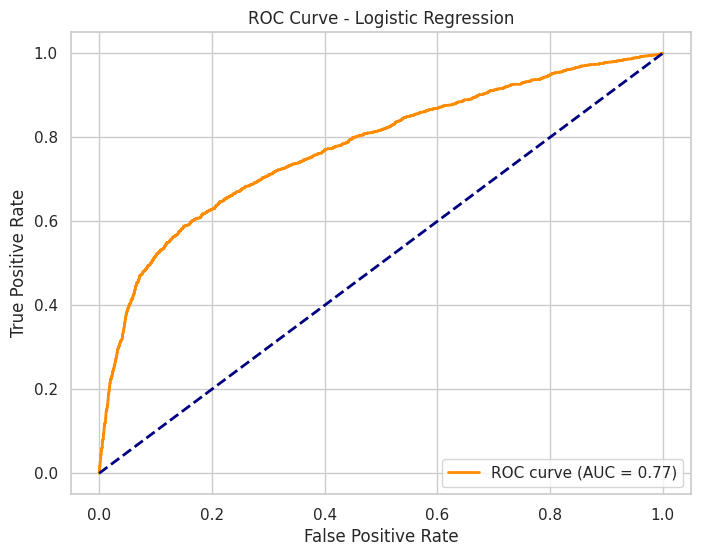

In [397]:
#Converting to predictions to probabilities
y_pred_proba=lor.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])
# Calculating the AUC(Area Under the Curve)
roc_auc=auc(fpr, tpr)

#Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr,tpr,color='darkorange',lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

* The ROC curve is above the diagonal line, which indicates that the model is performing better than random chance. The AUC of 0.77 means that the model is able to correctly classify 77% of positive cases while only incorrectly classifying 23% of negative cases

#Comparison of the models

##Logistic regression

In [398]:
report_lor_train=classification_report(y_train,y_pred_lor_train)
print("Classification report for train data:\n",report_lor_train)
report_lor_test = classification_report(y_test,y_pred_lor_test)
print("Classification report for test data:\n",report_lor_test)


Classification report for train data:
               precision    recall  f1-score   support

           0       0.88      0.85      0.86     12700
           1       0.54      0.59      0.56      3707

    accuracy                           0.79     16407
   macro avg       0.71      0.72      0.71     16407
weighted avg       0.80      0.79      0.80     16407

Classification report for test data:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      5354
           1       0.56      0.57      0.57      1678

    accuracy                           0.79      7032
   macro avg       0.71      0.71      0.71      7032
weighted avg       0.79      0.79      0.79      7032



##Random Forest

In [399]:
report_rf_train=classification_report(y_train,y_pred_rf_train)
print("Classification report for train data:\n",report_rf_train)
report_rf_test = classification_report(y_test,y_pred_rf_test)
print("Classification report for test data:\n",report_rf_test)


Classification report for train data:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96     12700
           1       0.84      0.86      0.85      3707

    accuracy                           0.93     16407
   macro avg       0.90      0.90      0.90     16407
weighted avg       0.93      0.93      0.93     16407

Classification report for test data:
               precision    recall  f1-score   support

           0       0.85      0.88      0.87      5354
           1       0.57      0.50      0.54      1678

    accuracy                           0.79      7032
   macro avg       0.71      0.69      0.70      7032
weighted avg       0.78      0.79      0.79      7032



##Adaboosting

In [400]:
report_ad_train=classification_report(y_train,y_pred_ad_train)
print("Classification report for train data:\n",report_ad_train)
report_ad_test = classification_report(y_test,y_pred_ad_test)
print("Classification report for test data:\n",report_ad_test)


Classification report for train data:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87     12700
           1       0.55      0.55      0.55      3707

    accuracy                           0.80     16407
   macro avg       0.71      0.71      0.71     16407
weighted avg       0.80      0.80      0.80     16407

Classification report for test data:
               precision    recall  f1-score   support

           0       0.86      0.87      0.86      5354
           1       0.56      0.54      0.55      1678

    accuracy                           0.79      7032
   macro avg       0.71      0.70      0.71      7032
weighted avg       0.79      0.79      0.79      7032



##Adaboosting (Logistic regression)

In [401]:
report_adl_train=classification_report(y_train,y_pred_adl_train)
print("Classification report for train data:\n",report_adl_train)
report_adl_test = classification_report(y_test,y_pred_adl_test)
print("Classification report for test data:\n",report_adl_test)

Classification report for train data:
               precision    recall  f1-score   support

           0       0.88      0.85      0.86     12700
           1       0.54      0.59      0.56      3707

    accuracy                           0.79     16407
   macro avg       0.71      0.72      0.71     16407
weighted avg       0.80      0.79      0.80     16407

Classification report for test data:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      5354
           1       0.56      0.57      0.57      1678

    accuracy                           0.79      7032
   macro avg       0.71      0.71      0.71      7032
weighted avg       0.79      0.79      0.79      7032



Logistic regression outperforms other models in terms of precision and recall for the minority class, demonstrating superior results relative to the alternative models

#Feature selection
In this scenario, we will utilize a subset of seven chosen features from the dataset, selected based on a correlation threshold of 0.1, for training the classification models,and will check,whether we can get similar or better performance using less *features*

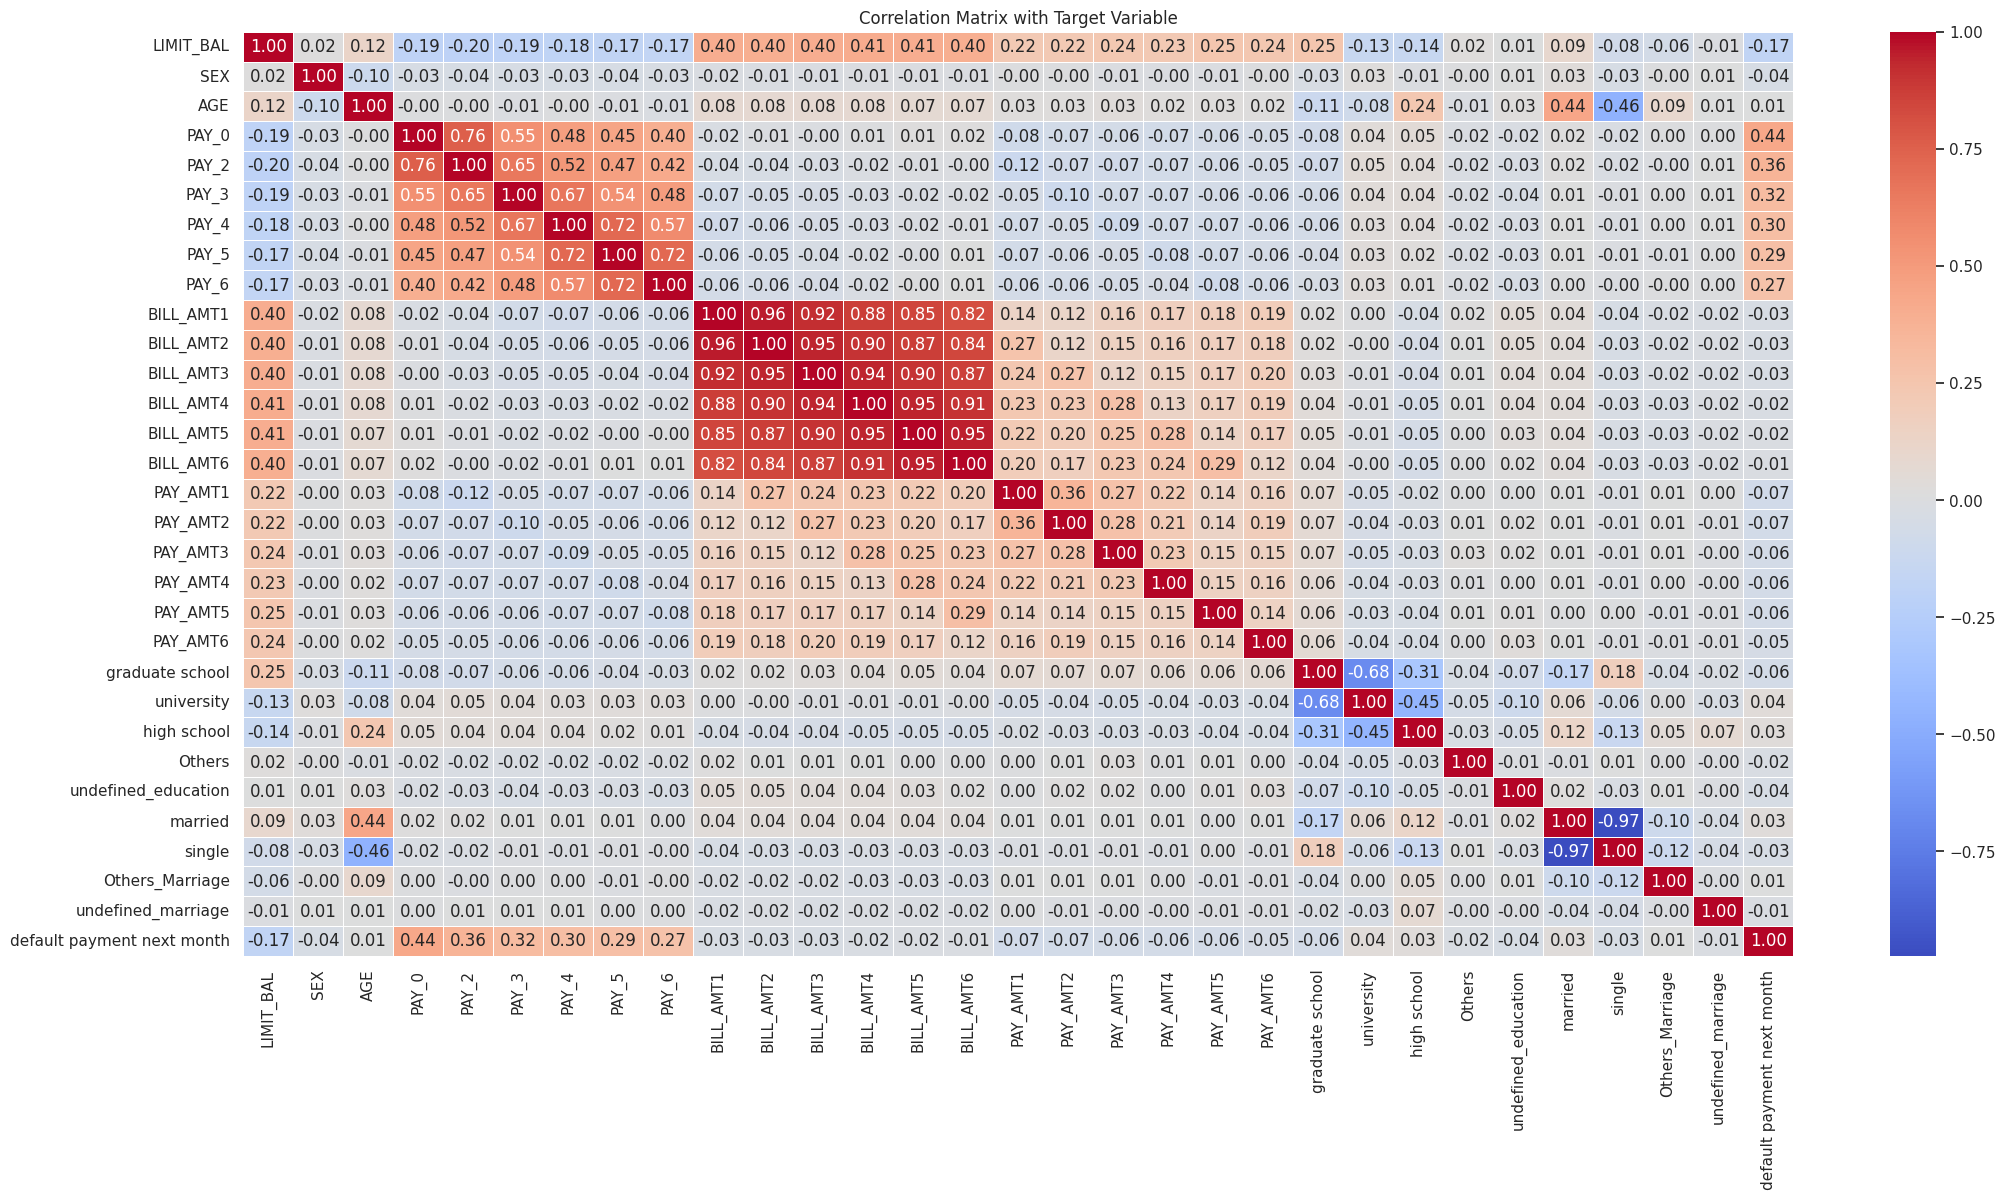


Selected Features based on correlation threshold 0.1:
['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default payment next month']


In [402]:
import seaborn as sns
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Concatenate X_scaled with y
data_with_target = pd.concat([pd.DataFrame(X_scaled, columns=X.columns), y], axis=1)

# Calculate the correlation matrix
correlation_matrix = data_with_target.corr()

# Plot the correlation matrix including y
plt.figure(figsize=(25, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix with Target Variable')
# Rotate x-axis and y-axis labels
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

# Set correlation threshold and select features
correlation_threshold = 0.1
selected_features = correlation_matrix[y.name][abs(correlation_matrix[y.name]) > correlation_threshold].index.tolist()

print(f"\nSelected Features based on correlation threshold {correlation_threshold}:\n{selected_features}")


Data considering only the selected features.

In [403]:
feature_select=data[selected_features]

In [404]:
feature_select

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default payment next month
2,120000,-1,2,-1,-1,-1,2,1
3,90000,-1,-1,-1,-1,-1,-1,0
4,50000,-1,-1,-1,-1,-1,-1,0
5,50000,-1,-1,-1,-1,-1,-1,0
6,50000,-1,-1,-1,-1,-1,-1,0
...,...,...,...,...,...,...,...,...
29996,220000,-1,-1,-1,-1,-1,-1,0
29997,150000,-1,-1,-1,-1,-1,-1,0
29998,30000,4,3,2,-1,-1,-1,1
29999,80000,1,-1,-1,-1,-1,-1,1


##Train test split

In [405]:
X1=feature_select.iloc[:,0:7]
y1=feature_select['default payment next month']
X_train1,X_test1,y_train1,y_test1=train_test_split(X1,y1,test_size=0.3)

##Feature scaling

In [406]:
scaler1=StandardScaler()
X_train1=scaler1.fit_transform(X_train1)
X_test1=scaler1.transform(X_test1)

##Balancing of the data using SMOTE(Synthetic Minority Over-sampling Technique)

In [407]:
from imblearn.over_sampling import SMOTE
sm1= SMOTE(random_state=42)
x_smote1,y_smote1 =sm1.fit_resample(X_train1,y_train1)
print('Original dataset shape', len(y_train1))
print('Resampled dataset shape', len(y_smote1))

Original dataset shape 16407
Resampled dataset shape 25284


##Logistic Regression
Training the data using the best model defined in the previous step.

In [408]:
lor1=LogisticRegression()
lor1.fit(x_smote1,y_smote1)

LogisticRegression()

In [409]:
y_pred_lor_train1=lor1.predict(X_train1)
y_pred_lor_test1=lor1.predict(X_test1)

In [410]:
report_lor_train1=classification_report(y_train1,y_pred_lor_train1)
print("Classification report for train data:\n",report_lor_train1)
report_lor_test1 = classification_report(y_test1,y_pred_lor_test1)
print("Classification report for test data:\n",report_lor_test1)

Classification report for train data:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86     12642
           1       0.54      0.58      0.56      3765

    accuracy                           0.79     16407
   macro avg       0.71      0.72      0.71     16407
weighted avg       0.80      0.79      0.79     16407

Classification report for test data:
               precision    recall  f1-score   support

           0       0.88      0.85      0.86      5412
           1       0.55      0.60      0.57      1620

    accuracy                           0.79      7032
   macro avg       0.71      0.73      0.72      7032
weighted avg       0.80      0.79      0.80      7032



In [411]:
#Roc-AUC score for test data
roc_lor1=roc_auc_score(y_test1,y_pred_lor_test1)

In [412]:
roc_lor1

0.7265541594809888

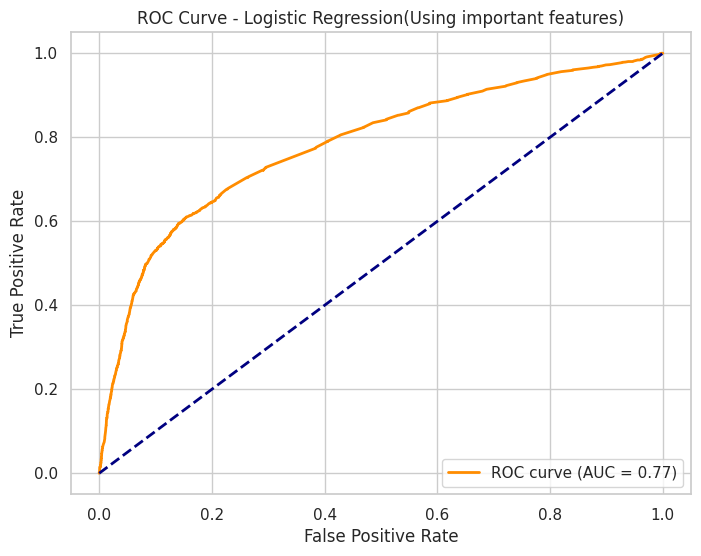

In [413]:
#Converting to predictions to probabilities
y_pred_proba1=lor1.predict_proba(X_test1)
fpr1, tpr1, thresholds1 = roc_curve(y_test1, y_pred_proba1[:,1])
# Calculating the AUC (Area Under the Curve)
roc_auc1=auc(fpr1, tpr1)
# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr1,tpr1,color='darkorange',lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression(Using important features)')
plt.legend(loc='lower right')
plt.show()


#CONCLUSION

* In the provided dataset, logistic regression emerges as the optimal model among various machine learning approaches, exhibiting an accuracy of 0.79 and a minority class recall of 0.57
* Additionally, focusing solely on six key features yields results akin to those obtained from the comprehensive feature set. This suggests that the prediction of a customer's likelihood to default on their next payment predominantly hinges on these six pivotal factors: the amount of credit extended ('LIMIT_BAL') and the repayment status across multiple periods ('PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'
